In [67]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score,recall_score,precision_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder 


In [3]:
#import data
data = pd.read_csv('C:\\Users\\BOOK\Documents\\DataScience_Project\\VLC-SGIT-25-014 - MODULE RESOURCE BUNDLE\\Module 1 - Finance\\Project 1 - Finance - Predictive Analytics\\Project 1 - Finance - Predictive Analytics\\Dataset\\loan.csv')
data.head()

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,05-04-2018,23-04-2018,24-04-2018,14-08-2018,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30-12-2022,31-12-2022,12-01-2023,05-04-2023,False
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15-11-2019,18-11-2019,27-11-2019,24-02-2020,False
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25-08-2021,08-09-2021,11-09-2021,25-02-2022,False
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,02-09-2020,07-09-2020,11-09-2020,29-12-2020,False


In [4]:
data.describe()

,loan_amount,interest_rate,loan_term,credit_score
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,49929.868000,0.079579,35.263000,573.206000
std,28721.249529,0.015230,13.792501,158.647522
min,1055.000000,0.031685,12.000000,300.000000
25%,24953.500000,0.069240,24.000000,435.000000
50%,49730.000000,0.079533,35.000000,571.000000
75%,75083.500000,0.089984,47.000000,712.000000
max,99989.000000,0.138894,59.000000,849.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        5000 non-null   object 
 1   loan_id            5000 non-null   object 
 2   loan_type          5000 non-null   object 
 3   loan_amount        5000 non-null   int64  
 4   interest_rate      5000 non-null   float64
 5   loan_term          5000 non-null   int64  
 6   employment_type    5000 non-null   object 
 7   income_level       5000 non-null   object 
 8   credit_score       5000 non-null   int64  
 9   gender             5000 non-null   object 
 10  marital_status     5000 non-null   object 
 11  education_level    5000 non-null   object 
 12  application_date   5000 non-null   object 
 13  approval_date      5000 non-null   object 
 14  disbursement_date  5000 non-null   object 
 15  due_date           5000 non-null   object 
 16  default_status     5000 

In [178]:
data.shape

(5000, 17)

In [13]:
data.dtypes

customer_id           object
loan_id               object
loan_type             object
loan_amount            int64
interest_rate        float64
loan_term              int64
employment_type       object
income_level          object
credit_score           int64
gender                object
marital_status        object
education_level       object
application_date      object
approval_date         object
disbursement_date     object
due_date              object
default_status          bool
dtype: object

In [179]:
data.isnull().all()

customer_id          False
loan_id              False
loan_type            False
loan_amount          False
interest_rate        False
loan_term            False
employment_type      False
income_level         False
credit_score         False
gender               False
marital_status       False
education_level      False
application_date     False
approval_date        False
disbursement_date    False
due_date             False
default_status       False
dtype: bool

In [180]:
data.columns

Index(['customer_id', 'loan_id', 'loan_type', 'loan_amount', 'interest_rate',
       'loan_term', 'employment_type', 'income_level', 'credit_score',
       'gender', 'marital_status', 'education_level', 'application_date',
       'approval_date', 'disbursement_date', 'due_date', 'default_status'],
      dtype='object')

In [9]:
data.isna().sum()*100/len(data)

customer_id          0.0
loan_id              0.0
loan_type            0.0
loan_amount          0.0
interest_rate        0.0
loan_term            0.0
employment_type      0.0
income_level         0.0
credit_score         0.0
gender               0.0
marital_status       0.0
education_level      0.0
application_date     0.0
approval_date        0.0
disbursement_date    0.0
due_date             0.0
default_status       0.0
dtype: float64

In [182]:
data.duplicated().sum()*100/len(data)

0.0

In [183]:
data.describe()

,loan_amount,interest_rate,loan_term,credit_score
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,49929.868000,0.079579,35.263000,573.206000
std,28721.249529,0.015230,13.792501,158.647522
min,1055.000000,0.031685,12.000000,300.000000
25%,24953.500000,0.069240,24.000000,435.000000
50%,49730.000000,0.079533,35.000000,571.000000
75%,75083.500000,0.089984,47.000000,712.000000
max,99989.000000,0.138894,59.000000,849.000000


In [10]:
pd.crosstab(data['credit_score'],data['default_status'],margins = True)

default_status,False,True,All
credit_score,,,
300,10,2,12
301,5,4,9
302,6,1,7
303,5,3,8
304,7,3,10
...,...,...,...
846,6,1,7
847,6,1,7
848,12,2,14


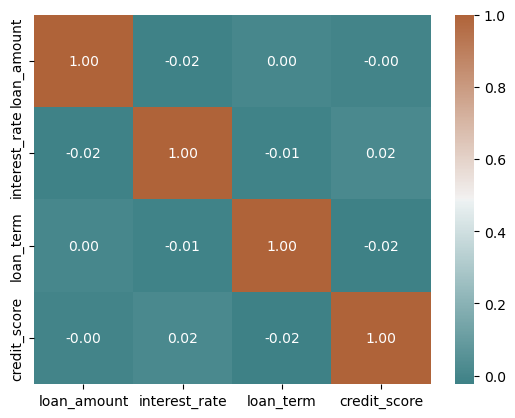

In [12]:
numeric_data = data.select_dtypes(include=['float64', 'int64']) # since our data has non numeric data as well

corr = numeric_data.corr() # Finding the correlation between different columns

#Generate Color Map, red & blue
colorsintheheatmap = sns.diverging_palette(3800, 30, as_cmap=True)

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colorsintheheatmap, annot=True, fmt=".2f")
plt.show()

In [56]:
label_encoder = preprocessing.LabelEncoder() 
 
 # convert categorical columns to numerical values
 
 #Encode labels in column. 
data['default_status']= label_encoder.fit_transform(data['default_status']) 
data['income_level']= label_encoder.fit_transform(data['income_level']) 
data['employment_type']= label_encoder.fit_transform(data['employment_type']) 
data['marital_status']= label_encoder.fit_transform(data['marital_status']) 
data['education_level']= label_encoder.fit_transform(data['education_level']) 
data['gender']= label_encoder.fit_transform(data['gender']) 
data['loan_type']= label_encoder.fit_transform(data['loan_type']) 
   

In [57]:

x= data.drop(columns=['default_status','customer_id','loan_id',
                      'application_date','approval_date','disbursement_date','due_date'])
x.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level
0,0,16795,0.051852,15,2,2,833,1,2,2
1,3,1860,0.089296,56,0,2,776,0,1,0
2,3,77820,0.070470,51,0,1,697,1,0,1
3,0,55886,0.062155,30,0,1,795,0,1,3
4,2,7265,0.070635,48,1,1,519,0,1,1


In [35]:
y=data['default_status']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: default_status, dtype: int64

In [36]:
#  Split the model into test and training data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [45]:
# Create the model with specified parameters

#Create a svm Classifier
clf = svm.SVC(kernel='sigmoid') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
prediction = clf.predict(x_test)

In [43]:
y_test

4548    0
3743    0
418     0
839     0
3008    0
       ..
1561    1
3439    0
355     0
3986    0
3529    1
Name: default_status, Length: 1000, dtype: int64

In [71]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test,prediction))

# Model Precision
print("Precision:",metrics.precision_score(y_test,prediction))

# Model Recall
print("Recall:",metrics.recall_score(y_test,prediction))

Accuracy: 0.667
Precision: 0.18446601941747573
Recall: 0.18719211822660098


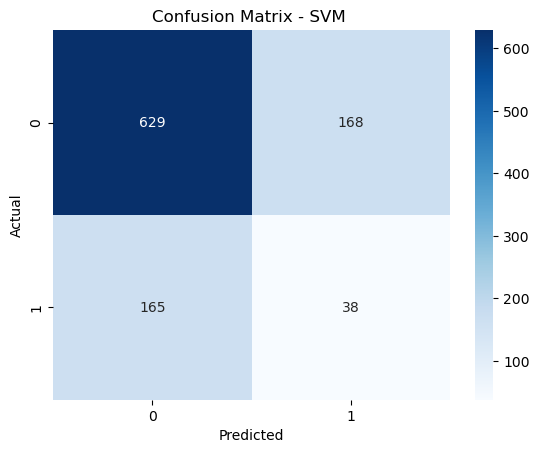

In [75]:
# ---------Confusion Matrix Visualization----------------

sns.heatmap(confusion_matrix(y_test,prediction), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM ')
plt.show()